In [8]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import sys
import yfinance as yf
tqdm.pandas()
sys.path.insert(2,'..')


In [2]:
import sys
sys.path.insert(2,'..')


In [14]:
import functions
import selection
import DataPull
import annualized_rv as arv

In [4]:
dataPulled = DataPull.pull_microsoft_option_data()


In [5]:
selected_data= selection.filter_options(dataPulled)
selected_data['implied_volatility'] = selected_data.progress_apply(functions.implied_volatility,axis =1 )


  0%|▎                                                                            | 295/60723 [00:00<03:07, 322.76it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  5%|███▌                                                                        | 2804/60723 [00:12<03:31, 274.30it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

NameError: name 'selection_sp500' is not defined

In [6]:
dailyAverageIV= functions.average_daily_implied_volatility(selected_data)


[*********************100%%**********************]  1 of 1 completed


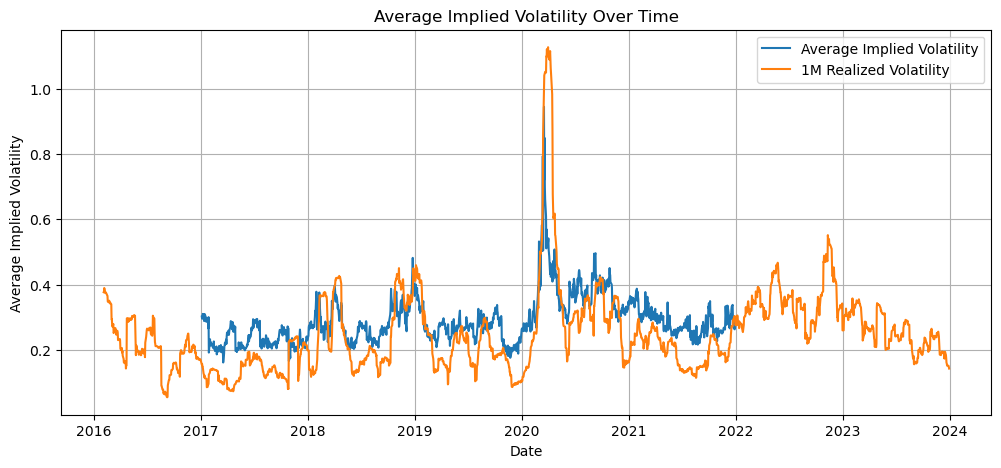

In [15]:
stock_data = yf.download('MSFT', start='2016-01-01', end='2023-12-31')
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

window = 21
stock_data['1M Realized Volatility'] = arv.annualized_volatility(stock_data['Daily Return'],window)


#plotting

plt.figure(figsize=(12, 5))
plt.plot(dailyAverageIV['date'], dailyAverageIV['average_iv'],label='Average Implied Volatility')
plt.plot(stock_data.index, stock_data['1M Realized Volatility'], label='1M Realized Volatility')

plt.title('Average Implied Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Average Implied Volatility')
plt.grid(True)
plt.legend()

#compare with actual volatiltiy

plt.show()

In [10]:
# current_dir = os.getcwd()
# data_dir = os.path.join(current_dir, 'data')
# os.makedirs(data_dir, exist_ok=True)
# series.to_pickle(os.path.join(data_dir, 'average_iv_series_with_date_microsoft.pkl'))


In [17]:
dailyAverageIV

,date,average_iv
0,2017-01-03,0.301849
1,2017-01-04,0.295451
2,2017-01-05,0.295422
3,2017-01-06,0.310046
4,2017-01-09,0.307149
...,...,...
1254,2021-12-27,0.262805
1255,2021-12-28,0.267030
1256,2021-12-29,0.275513
1257,2021-12-30,0.298512


In [32]:
car = 'm1sft_mean_iv_2017_220222'
dailyAverageIV.to_pickle(os.path.join('historicImpliedVolData', car+'.pkl',))

In [35]:
# in function form for usability 

def dailymeanVolpkl(data : pd.DataFrame ,name : str) -> None:
    selected_data= selection.filter_options(data) # filters data based on time to maturity/moneyness 
    selected_data['implied_volatility'] = selected_data.progress_apply(functions.implied_volatility,axis =1 ) #calcs daily iv
    
    dailyAverageIV= functions.average_daily_implied_volatility(selected_data) #means the IV
    dailyAverageIV.to_pickle(os.path.join('historicImpliedVolData', name+'.pkl'))
    print(name , "done")

In [36]:
dailymeanVolpkl(DataPull.pull_alphabet_option_data(),'goog_mean_iv_2017_2022')

  0%|                                                                            | 1/213806 [00:00<18:51:21,  3.15it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  1%|█                                                                          | 2987/213806 [00:15<27:05, 129.67it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

goog_mean_iv_2017_2022 done


In [37]:
dailymeanVolpkl(DataPull.pull_apple_option_data(),'aapl_mean_iv_2017_2022')

  0%|                                                                              | 76/53979 [00:00<02:03, 436.81it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  3%|██▎                                                                         | 1645/53979 [00:08<04:08, 210.98it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

aapl_mean_iv_2017_2022 done


In [38]:
dailymeanVolpkl(DataPull.pull_nasdaq100_option_data(),'ndx_mean_iv_2017_2022')

  0%|                                                                            | 23/448300 [00:00<3:58:49, 31.28it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  1%|▌                                                                          | 3104/448300 [00:21<24:53, 298.14it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

ndx_mean_iv_2017_2022 done


In [39]:
dailymeanVolpkl(DataPull.pull_sp500_option_data(),'spc_mean_iv_2017_2022')

  0%|                                                                         | 233/1029654 [00:02<2:10:59, 130.98it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  0%|▏                                                                       | 1791/1029654 [00:10<1:31:31, 187.19it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

spc_mean_iv_2017_2022 done
